<a href="https://colab.research.google.com/github/0xajinkya/Deep-Learning/blob/main/FashionGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
ds = tfds.load("fashion_mnist", split="train")
ds.as_numpy_iterator().next()["label"]

2

In [ ]:
import numpy as np

In [ ]:
dataiterator = ds.as_numpy_iterator()

In [ ]:
dataiterator.next()["image"]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

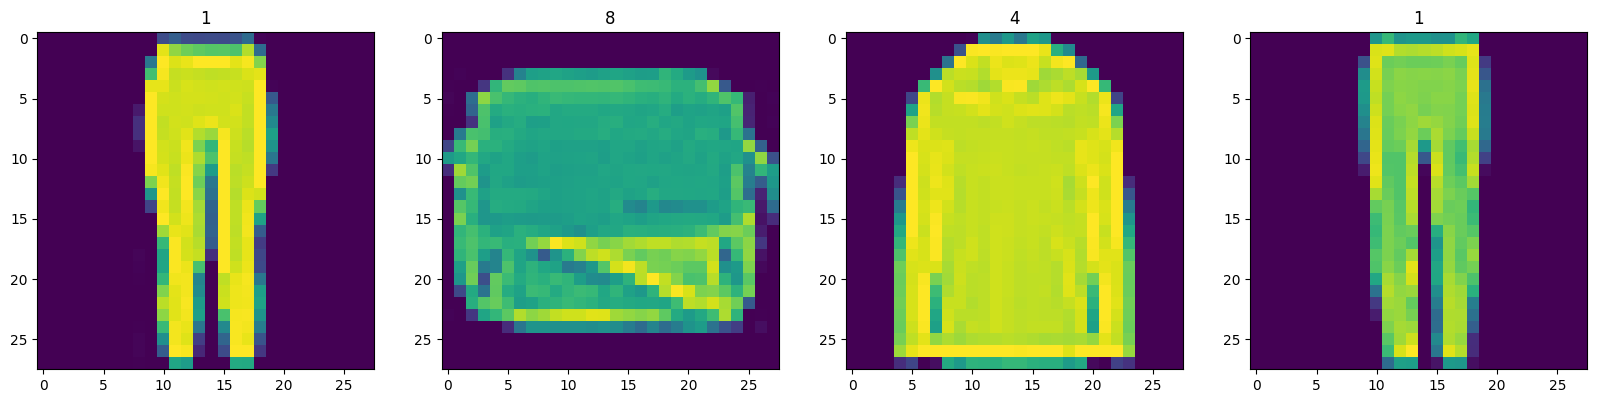

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))

for idx in range(4):
  sample = dataiterator.next()
  ax[idx].imshow(np.squeeze(sample["image"]))
  ax[idx].title.set_text(sample["label"])

In [ ]:
def scale_images(data):
  image = data["image"]
  return image/255

In [ ]:
ds = tfds.load("fashion_mnist", split="train")
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [ ]:
def build_generator():
  model = Sequential()

  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding="same"))
  model.add(LeakyReLU(0.2))

  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding="same"))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 4, padding="same"))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(128, 4, padding="same"))
  model.add(LeakyReLU(0.2))

  model.add(Conv2D(1, 4, padding="same", activation="sigmoid"))

  return model

In [ ]:
generator = build_generator()

In [ ]:
generator.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_10 (UpSamplin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [ ]:
img = generator.predict(np.random.randn(4, 128, 1))

1/1 [==============================] - 0s 86ms/step


In [ ]:
img[0].shape

(28, 28, 1)

1/1 [==============================] - 0s 22ms/step


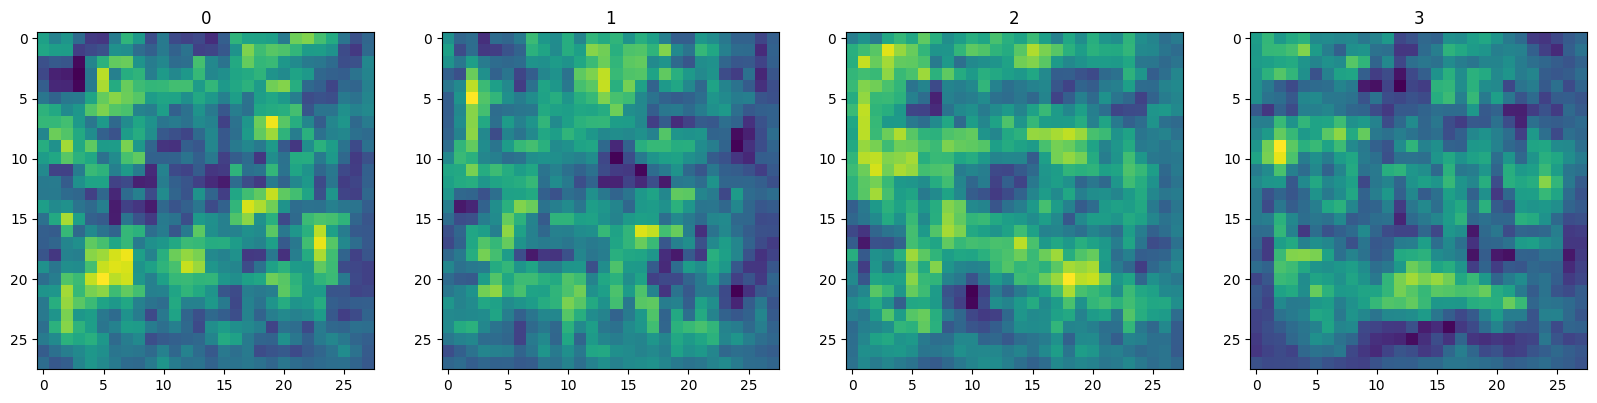

In [ ]:
img = generator.predict(np.random.randn(4, 128, 1))
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

for idx, gen_img in enumerate(img):
  ax[idx].imshow(np.squeeze(gen_img))
  ax[idx].title.set_text(idx)

In [ ]:
img[0].shape

(28, 28, 1)

In [ ]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [ ]:
discriminator = build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_61 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_40 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_41 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_63 (Conv2D)          (None, 16, 16, 128)     

In [ ]:
# img = img[0]

In [ ]:
img.shape

(4, 28, 28, 1)

In [ ]:
discriminator.predict(img)

1/1 [==============================] - 0s 245ms/step


array([[0.50607204],
       [0.5061892 ],
       [0.5062433 ],
       [0.5060963 ]], dtype=float32)